<a href="https://colab.research.google.com/github/lada-nikiforova/MachineLearning/blob/main/credit_card_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import torch

# **Анализ датасета**

# 1. Загружаем данные


Загружаем файл из репоизтория Git:


In [ ]:
url = "https://raw.githubusercontent.com/lada-nikiforova/MachineLearning/main/credit_card_approval.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о прогнозах выдачи одобрений по кредитным картам 537 тысяч клиентов. Для каждого клиента указаны его номер, пол, есть ли машина, есть ли недвижимость, число детей, годовой доход, уровень образования, семейное положение, тип жилья, возраст в днях, продолжительность работы, есть ли мобильный телефон, есть ли рабочий телефон, есть ли электронная почта, работа, рекордный месяц, положение дел, цель.


In [ ]:
data_raw.shape

(537667, 19)

In [ ]:
data_raw.head(15)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0
5,5067057,F,Y,Y,No children,144000.0,Secondary / secondary special,Married,House / apartment,-15394,-2959,1,0,1,0,Core staff,-25,0,0
6,5095635,M,Y,N,1 children,180000.0,Higher education,Married,House / apartment,-11178,-219,1,0,0,0,Drivers,-19,X,0
7,5096402,M,Y,N,No children,405000.0,Higher education,Married,House / apartment,-18655,-3200,1,1,1,0,High skill tech staff,-18,X,0
8,5061372,F,N,Y,1 children,135000.0,Secondary / secondary special,Single / not married,House / apartment,-17068,-8325,1,0,0,0,Laborers,-43,0,0
9,5026464,F,N,Y,1 children,270000.0,Secondary / secondary special,Married,House / apartment,-16616,-2722,1,1,1,0,Realty agents,-38,0,0


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  JOB              

Мы видим что столбцы(признаки) имеют имена:
- `ID ` - номер
- `CODE_GENDER` - пол (F-женский, M-мужской)
- `FLAG_OWN_CAR` - есть ли машина (Y-да, N-нет)
- `FLAG_OWN_REALTY` - есть ли недвижимость (Y-да, N-нет)
- `CNT_CHILDREN` - число детей
- `AMT_INCOME_TOTAL` - годовой доход
- `NAME_EDUCATION_TYPE` - уровень образования
- `NAME_FAMILY_STATUS` - семейное положение
- `NAME_HOUSING_TYPE` - тип жилья
- `DAYS_BIRTH` - возраст (в днях)
- `DAYS_EMPLOYED` - продолжительность работы (в днях)
- `FLAG_MOBIL` - есть ли мобильный телефон (1-есть, 0-нет)
- `FLAG_WORK_PHONE` - есть ли рабочий телефон (1-есть, 0-нет)
- `FLAG_PHONE` - есть ли телефон (1-есть, 0-нет)
- `FLAG_EMAIL` - есть ли электронная почта (1-есть, 0-нет)
- `JOB` - работа
- `BEGIN_MONTHS` - рекордный месяц (месяц извлеченных данных — это начальная точка, в обратном направлении, 0 — текущий месяц, -1 — предыдущий месяц и т. д.)
- `STATUS` - положение дел (0: просрочка на 1-29 дней 1: просрочка на 30-59 дней 2: просрочка на 60-89 дней 3: просрочка на 90-119 дней 4: просрочка на 120-149 дней 5: Просроченная или безнадежная задолженность, списание на сумму более 150 дней C: погашение в этом месяце X: кредита в этом месяце нет)
- `TARGET` - цель (пользователь риска помечен как «1», иначе — «0».)

Признаки `CNT_CHILDREN`, `NAME_EDUCATION_TYPE`, `NAME_FAMILY_STATUS`, `NAME_HOUSING_TYPE`, `STATUS`, `JOB` -категориальные, `CODE_GENDER`,  `FLAG_OWN_CAR`, `FLAG_OWN_REALTY`, `FLAG_MOBIL`, `FLAG_WORK_PHONE`, `FLAG_PHONE`, `FLAG_EMAIL`, `TARGET` - бинарные, остальные признаки - количественные (числовые).


Информация о признаках:


In [ ]:
data_raw.describe()

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS,TARGET
count,5.376670e+05,5.376670e+05,537667.000000,537667.000000,537667.0,537667.000000,537667.000000,537667.000000,537667.000000,537667.000000
mean,5.079231e+06,1.971171e+05,-15010.958999,-2762.029935,1.0,0.281615,0.298893,0.100730,-19.305241,0.003649
std,4.200200e+04,1.041390e+05,3416.418092,2393.919456,0.0,0.449787,0.457773,0.300971,14.037827,0.060298
min,5.008806e+06,2.700000e+04,-24611.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,-60.000000,0.000000
25%,5.044925e+06,1.350000e+05,-17594.000000,-3661.000000,1.0,0.000000,0.000000,0.000000,-29.000000,0.000000
50%,5.079091e+06,1.800000e+05,-14785.000000,-2147.000000,1.0,0.000000,0.000000,0.000000,-17.000000,0.000000
75%,5.115755e+06,2.295000e+05,-12239.000000,-1050.000000,1.0,1.000000,1.000000,0.000000,-8.000000,0.000000
max,5.150487e+06,1.575000e+06,-7489.000000,-17.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000


Приведу бинарные и категориальные признаки к типу category:


In [ ]:
data_raw['CNT_CHILDREN'] = data_raw['CNT_CHILDREN'].astype('category')
data_raw['NAME_EDUCATION_TYPE'] = data_raw['NAME_EDUCATION_TYPE'].astype('category')
data_raw['NAME_FAMILY_STATUS'] = data_raw['NAME_FAMILY_STATUS'].astype('category')
data_raw['NAME_HOUSING_TYPE'] = data_raw['NAME_HOUSING_TYPE'].astype('category')
data_raw['STATUS'] = data_raw['STATUS'].astype('category')
data_raw['JOB'] = data_raw['JOB'].astype('category')
data_raw['CODE_GENDER'] = data_raw['CODE_GENDER'].astype('category')
data_raw['FLAG_OWN_CAR'] = data_raw['FLAG_OWN_CAR'].astype('category')
data_raw['FLAG_OWN_REALTY'] = data_raw['FLAG_OWN_REALTY'].astype('category')
data_raw['FLAG_MOBIL'] = data_raw['FLAG_MOBIL'].astype('category')
data_raw['FLAG_WORK_PHONE'] = data_raw['FLAG_WORK_PHONE'].astype('category')
data_raw['FLAG_PHONE'] = data_raw['FLAG_PHONE'].astype('category')
data_raw['FLAG_EMAIL'] = data_raw['FLAG_EMAIL'].astype('category')
data_raw['TARGET'] = data_raw['TARGET'].astype('category')





In [ ]:
data_raw['CNT_CHILDREN'].dtype

CategoricalDtype(categories=['1 children', '2+ children', 'No children'], ordered=False)

In [ ]:
data_raw['NAME_EDUCATION_TYPE'].dtype

CategoricalDtype(categories=['Academic degree', 'Higher education', 'Incomplete higher',
                  'Lower secondary', 'Secondary / secondary special'],
, ordered=False)

In [ ]:
data_raw['NAME_FAMILY_STATUS'].dtype

CategoricalDtype(categories=['Civil marriage', 'Married', 'Separated',
                  'Single / not married', 'Widow'],
, ordered=False)

In [ ]:
data_raw['NAME_HOUSING_TYPE'].dtype

CategoricalDtype(categories=['Co-op apartment', 'House / apartment',
                  'Municipal apartment', 'Office apartment',
                  'Rented apartment', 'With parents'],
, ordered=False)

In [ ]:
data_raw['STATUS'].dtype

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', 'C', 'X'], ordered=False)

In [ ]:
data_raw['JOB'].dtype

CategoricalDtype(categories=['Accountants', 'Cleaning staff', 'Cooking staff',
                  'Core staff', 'Drivers', 'HR staff', 'High skill tech staff',
                  'IT staff', 'Laborers', 'Low-skill Laborers', 'Managers',
                  'Medicine staff', 'Private service staff', 'Realty agents',
                  'Sales staff', 'Secretaries', 'Security staff',
                  'Waiters/barmen staff'],
, ordered=False)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   537667 non-null  int64   
 1   CODE_GENDER          537667 non-null  category
 2   FLAG_OWN_CAR         537667 non-null  category
 3   FLAG_OWN_REALTY      537667 non-null  category
 4   CNT_CHILDREN         537667 non-null  category
 5   AMT_INCOME_TOTAL     537667 non-null  float64 
 6   NAME_EDUCATION_TYPE  537667 non-null  category
 7   NAME_FAMILY_STATUS   537667 non-null  category
 8   NAME_HOUSING_TYPE    537667 non-null  category
 9   DAYS_BIRTH           537667 non-null  int64   
 10  DAYS_EMPLOYED        537667 non-null  int64   
 11  FLAG_MOBIL           537667 non-null  category
 12  FLAG_WORK_PHONE      537667 non-null  category
 13  FLAG_PHONE           537667 non-null  category
 14  FLAG_EMAIL           537667 non-null  category
 15  

Выведу информацию о числовых признаках:

In [ ]:
data_raw.describe()

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,BEGIN_MONTHS
count,5.376670e+05,5.376670e+05,537667.000000,537667.000000,537667.000000
mean,5.079231e+06,1.971171e+05,-15010.958999,-2762.029935,-19.305241
std,4.200200e+04,1.041390e+05,3416.418092,2393.919456,14.037827
min,5.008806e+06,2.700000e+04,-24611.000000,-15713.000000,-60.000000
25%,5.044925e+06,1.350000e+05,-17594.000000,-3661.000000,-29.000000
50%,5.079091e+06,1.800000e+05,-14785.000000,-2147.000000,-17.000000
75%,5.115755e+06,2.295000e+05,-12239.000000,-1050.000000,-8.000000
max,5.150487e+06,1.575000e+06,-7489.000000,-17.000000,0.000000


Информация о категориальных признаках:

In [ ]:
data_raw.describe(include=['category'])

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,STATUS,TARGET
count,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667
unique,2,2,2,3,5,5,6,1,2,2,2,18,8,2
top,F,N,Y,No children,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,C,0
freq,333832,306207,345471,343151,358317,384003,474177,537667,386252,376962,483508,131572,226185,535705


## Пропущенные значения:

In [ ]:
data_raw.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
JOB                    0
BEGIN_MONTHS           0
STATUS                 0
TARGET                 0
dtype: int64

Как видно, пропущенных значений нет.

## Визуализация, анализ:


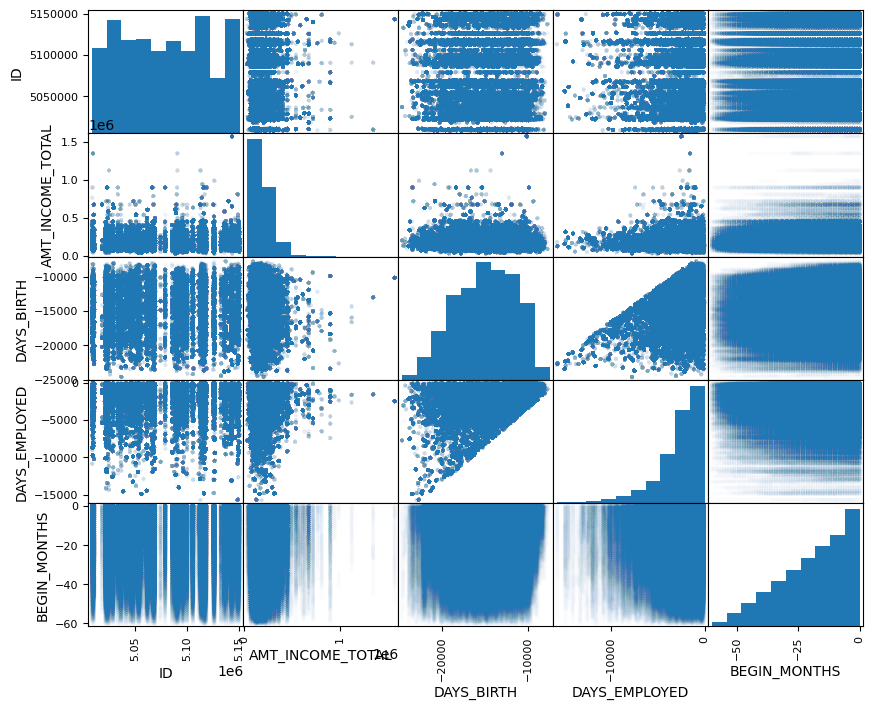

In [ ]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8),alpha=.01)
pass

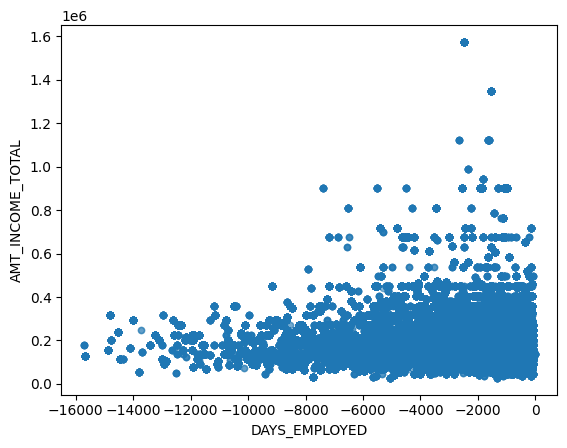

In [ ]:
data_raw.plot(kind='scatter', x='DAYS_EMPLOYED', y='AMT_INCOME_TOTAL',alpha=.21)
pass

Мы видим, что основная масса точек сгрудилась в правом нижнем углу. Какие-то точки вылезают из этого диапазона. Это выбросы (outliers) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

Для обнаружения выбросов найдем, например, квантили для признаков AMT_INCOME_TOTAL и DAYS_EMPLOYED:


In [ ]:
data_raw['AMT_INCOME_TOTAL'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     54000.0
0.010     67500.0
0.050     81000.0
0.100     99000.0
0.500    180000.0
0.900    315000.0
0.950    360000.0
0.990    585000.0
0.995    675000.0
Name: AMT_INCOME_TOTAL, dtype: float64

Мы видим, например, что
 всех значений признака 'AMT_INCOME_TOTAL' находится в диапазоне от 54
 до
 675 тыс. руб. (это значения квантилей, соответствующих уровням 0.005
 и 0.995
 соответственно)

In [ ]:
data_raw['DAYS_EMPLOYED'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005   -12455.0
0.010   -11494.0
0.050    -7736.0
0.100    -5849.0
0.500    -2147.0
0.900     -431.0
0.950     -249.0
0.990     -110.0
0.995     -101.0
Name: DAYS_EMPLOYED, dtype: float64

Удалим все строки таблицы, в которых 'AMT_INCOME_TOTAL' или 'DAYS_EMPLOYED' выходят за пределы квантилей 0.005 и 0.995

In [ ]:
rows_to_drop = data_raw[
    (data_raw['AMT_INCOME_TOTAL'] < data_raw['AMT_INCOME_TOTAL'].quantile(0.005)) | (data_raw['AMT_INCOME_TOTAL'] > data_raw['AMT_INCOME_TOTAL'].quantile(0.995)) |
    (data_raw['DAYS_EMPLOYED']  < data_raw['DAYS_EMPLOYED' ].quantile(0.005)) | (data_raw['DAYS_EMPLOYED']  > data_raw['DAYS_EMPLOYED' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(528386, 19)

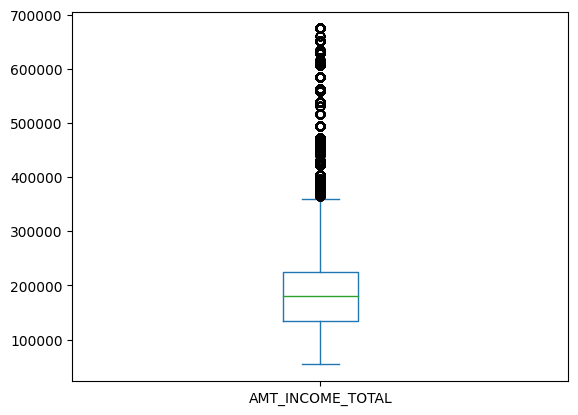

In [ ]:
data['AMT_INCOME_TOTAL'].plot(kind='box')
pass

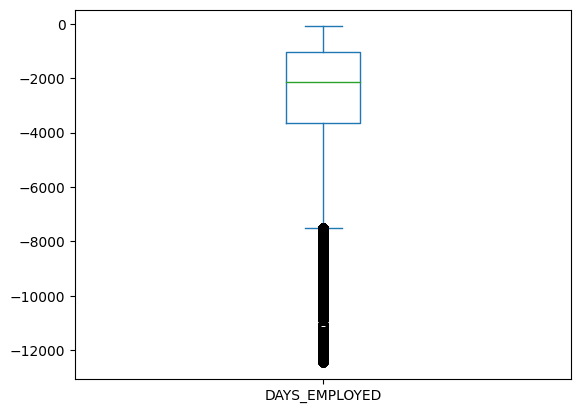

In [ ]:
data['DAYS_EMPLOYED'].plot(kind='box')
pass

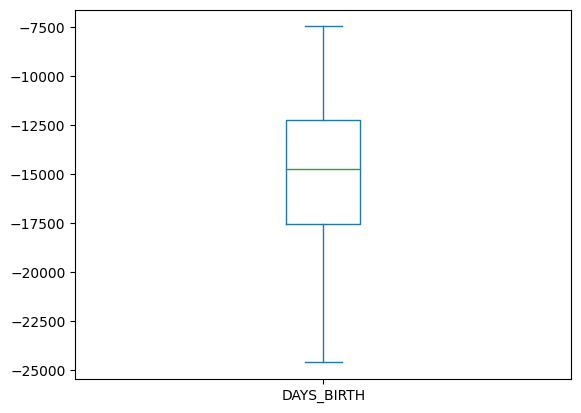

In [ ]:
data['DAYS_BIRTH'].plot(kind='box')
pass

In [ ]:
data_raw['DAYS_BIRTH'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005   -23253.0
0.010   -22659.0
0.050   -20870.0
0.100   -19721.0
0.500   -14785.0
0.900   -10520.0
0.950    -9957.0
0.990    -8948.0
0.995    -8654.0
Name: DAYS_BIRTH, dtype: float64

Построим теперь всевозможные диаграммы рассеивания:

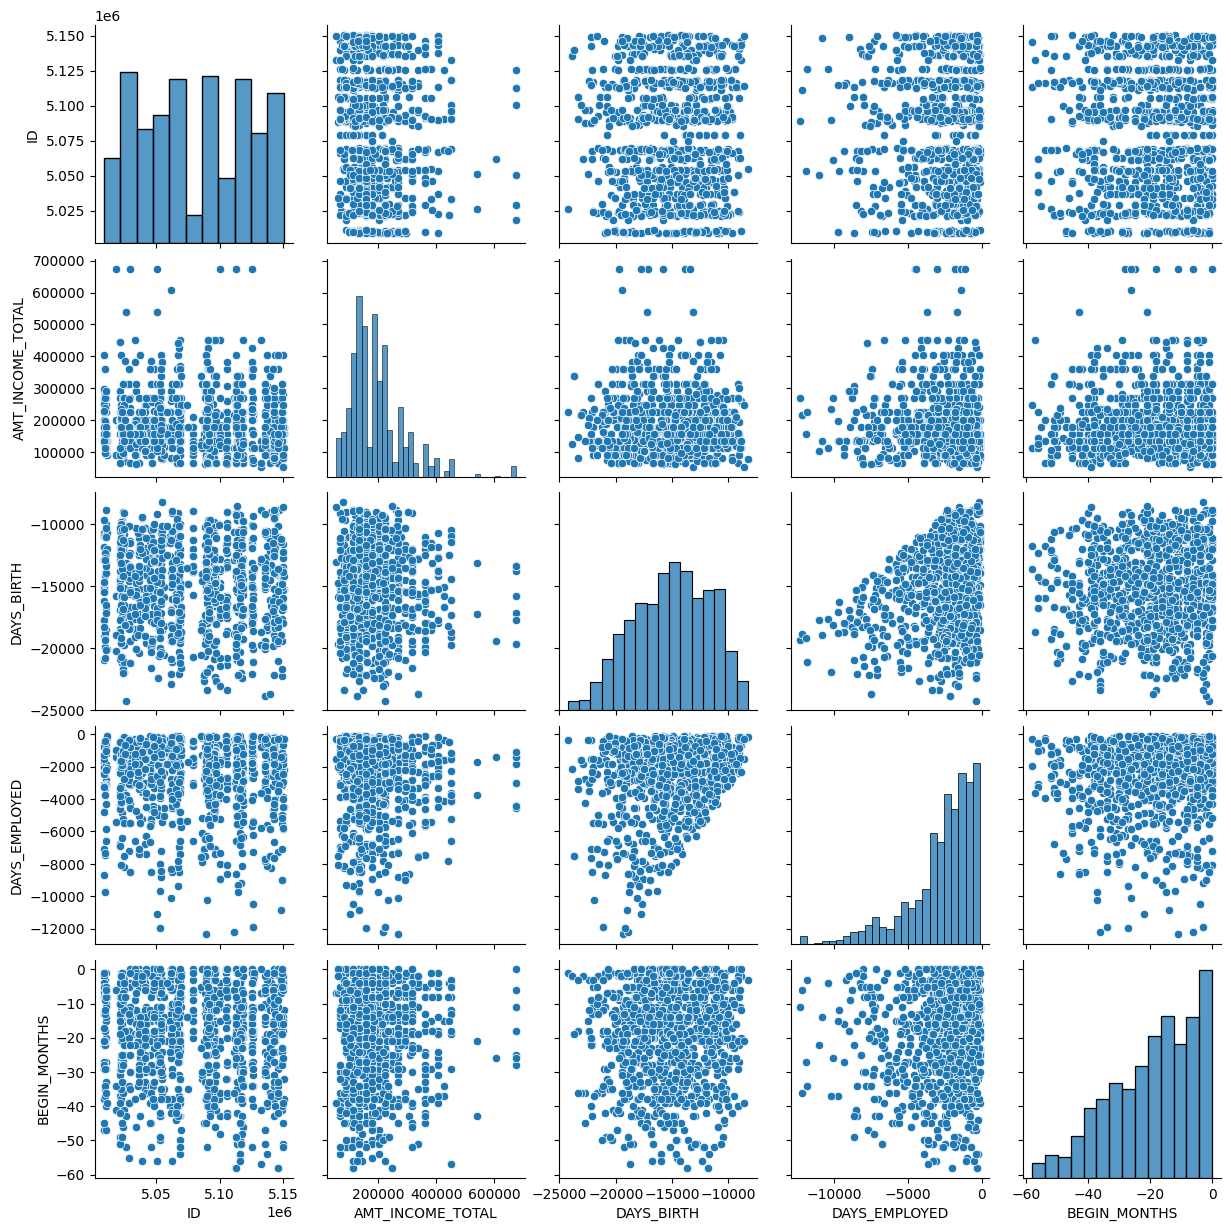

In [ ]:
sns.pairplot(data.sample(1000), diag_kind='hist')
pass

Как мне кажется теперь диаграмы рассеивания выглядят более "презентабельно". Уже можно рассмотреть некоторые зависимости, к примеру, зависимость роста от веса.

# Бинаризация номинальных признаков

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

Признаки `CNT_CHILDREN`, `NAME_EDUCATION_TYPE`, `NAME_FAMILY_STATUS`, `NAME_HOUSING_TYPE`, `STATUS`, `JOB` -категориальные, `CODE_GENDER`,  `FLAG_OWN_CAR`, `FLAG_OWN_REALTY`, `FLAG_MOBIL`, `FLAG_WORK_PHONE`, `FLAG_PHONE`, `FLAG_EMAIL`, `TARGET`

In [ ]:
data['CODE_GENDER'] = data['CODE_GENDER'].cat.codes
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].cat.codes
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].cat.codes
data['FLAG_MOBIL'] = data['FLAG_MOBIL'].cat.codes
data['FLAG_WORK_PHONE'] = data['FLAG_WORK_PHONE'].cat.codes
data['FLAG_PHONE'] = data['FLAG_PHONE'].cat.codes
data['FLAG_EMAIL'] = data['FLAG_EMAIL'].cat.codes
data['TARGET'] = data['TARGET'].cat.codes

К категориальному (небинарному) признаку применим метод бинаризации (one-hot encoding)

In [ ]:
CNT_CHILDREN_dummies = pd.get_dummies(data['CNT_CHILDREN'])
NAME_EDUCATION_TYPE_dummies = pd.get_dummies(data['NAME_EDUCATION_TYPE'])
NAME_FAMILY_STATUS_dummies = pd.get_dummies(data['NAME_FAMILY_STATUS'])
NAME_HOUSING_TYPE_dummies = pd.get_dummies(data['NAME_HOUSING_TYPE'])
STATUS_dummies = pd.get_dummies(data['STATUS'])
JOB_dummies = pd.get_dummies(data['JOB'])

In [ ]:
data = pd.concat((data, CNT_CHILDREN_dummies), axis=1)
data = data.drop(['CNT_CHILDREN'], axis=1)

In [ ]:
data = pd.concat((data, NAME_EDUCATION_TYPE_dummies), axis=1)
data = data.drop(['NAME_EDUCATION_TYPE'], axis=1)

In [ ]:
data = pd.concat((data, NAME_FAMILY_STATUS_dummies), axis=1)
data = data.drop(['NAME_FAMILY_STATUS'], axis=1)

In [ ]:
data = pd.concat((data, NAME_HOUSING_TYPE_dummies), axis=1)
data = data.drop(['NAME_HOUSING_TYPE'], axis=1)

In [ ]:
data = pd.concat((data, STATUS_dummies), axis=1)
data = data.drop(['STATUS'], axis=1)

In [ ]:
data = pd.concat((data, JOB_dummies), axis=1)
data = data.drop(['JOB'], axis=1)

In [ ]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,5065438,0,1,0,270000.0,-13258,-2300,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5142753,0,0,0,81000.0,-17876,-377,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,5111146,1,1,1,270000.0,-19579,-1028,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,5010310,0,1,1,112500.0,-15109,-1956,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5010835,1,1,1,139500.0,-17281,-5578,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.corr()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
ID,1.000000,-0.000555,-0.023816,-0.085949,-0.034734,0.034856,0.020902,NaN,0.096561,0.013986,...,0.003327,0.009973,-0.018248,0.005673,0.009059,0.026970,0.006554,0.017566,-0.004592,0.030630
CODE_GENDER,-0.000555,1.000000,0.343442,-0.040729,0.200069,0.104790,0.123407,NaN,0.021641,-0.023628,...,0.225182,0.070506,0.072231,-0.158977,-0.074173,-0.014653,-0.205750,-0.053228,0.102228,-0.024196
FLAG_OWN_CAR,-0.023816,0.343442,1.000000,0.006078,0.196381,0.080408,0.057952,NaN,-0.023643,-0.033971,...,0.000473,-0.033796,0.118807,-0.061096,-0.030098,-0.005775,-0.082801,-0.034249,-0.029703,-0.027774
FLAG_OWN_REALTY,-0.085949,-0.040729,0.006078,1.000000,0.036503,-0.095686,-0.010372,NaN,-0.215345,-0.059190,...,-0.014546,-0.005081,0.013236,-0.000972,0.033024,0.016346,0.008576,-0.007385,0.011054,0.003023
AMT_INCOME_TOTAL,-0.034734,0.200069,0.196381,0.036503,1.000000,-0.044924,-0.014004,NaN,-0.074478,0.008902,...,-0.083009,-0.058963,0.295967,-0.073421,0.012996,0.025506,-0.080848,-0.026566,-0.033741,-0.031060
DAYS_BIRTH,0.034856,0.104790,0.080408,-0.095686,-0.044924,1.000000,0.298619,NaN,0.044477,-0.030814,...,0.019098,-0.002074,-0.039266,-0.057410,-0.020659,-0.011481,0.094727,-0.020024,-0.092888,0.028714
DAYS_EMPLOYED,0.020902,0.123407,0.057952,-0.010372,-0.014004,0.298619,1.000000,NaN,0.005655,-0.033278,...,-0.032612,0.018494,-0.034875,-0.136476,-0.023321,-0.000961,0.115068,0.000622,0.051369,0.025306
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.096561,0.021641,-0.023643,-0.215345,-0.074478,0.044477,0.005655,NaN,1.000000,0.373142,...,0.006604,0.011886,0.007400,-0.030045,0.006077,-0.012608,-0.014768,-0.000875,-0.024130,0.021792
FLAG_PHONE,0.013986,-0.023628,-0.033971,-0.059190,0.008902,-0.030814,-0.033278,NaN,0.373142,1.000000,...,-0.026680,-0.004245,0.010066,-0.021750,0.023161,0.010750,-0.006022,-0.002592,-0.038781,0.006467


<Axes: >

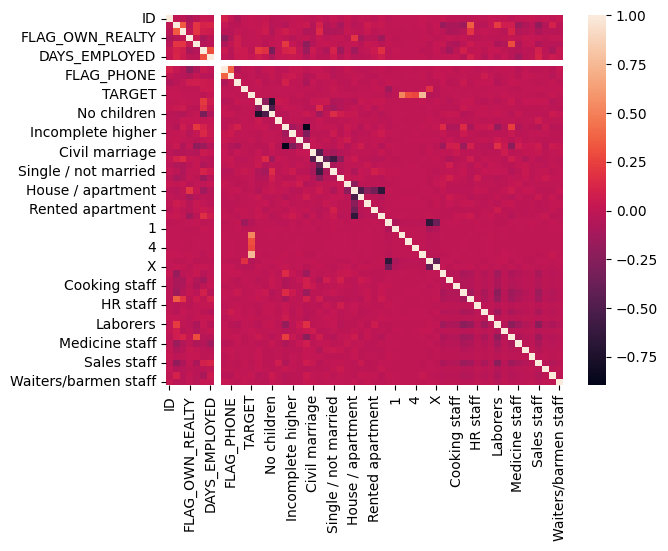

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
count,5.283860e+05,528386.000000,528386.000000,528386.000000,528386.000000,528386.000000,528386.000000,528386.0,528386.000000,528386.000000,...,528386.000000,528386.000000,528386.000000,528386.000000,528386.000000,528386.000000,528386.000000,528386.000000,528386.000000,528386.000000
mean,5.079187e+06,0.380425,0.431524,0.642103,194893.332622,-14978.062418,-2718.079614,0.0,0.280085,0.298585,...,0.247315,0.006751,0.123841,0.048671,0.012707,0.002385,0.131625,0.005960,0.022641,0.004839
std,4.199613e+04,0.485492,0.495289,0.479382,92356.131095,3389.574908,2271.132767,0.0,0.449041,0.457638,...,0.431452,0.081885,0.329401,0.215179,0.112005,0.048774,0.338083,0.076969,0.148755,0.069396
min,5.008806e+06,0.000000,0.000000,0.000000,54000.000000,-24611.000000,-12455.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.044789e+06,0.000000,0.000000,0.000000,135000.000000,-17551.000000,-3634.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.079068e+06,0.000000,0.000000,1.000000,180000.000000,-14774.000000,-2147.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.115693e+06,1.000000,1.000000,1.000000,225000.000000,-12238.000000,-1054.000000,0.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.150487e+06,1.000000,1.000000,1.000000,675000.000000,-7489.000000,-101.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.groupby('TARGET').mean()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
TARGET,,,,,,,,,,,,,,,,,,,,,
0,5.079143e+06,0.379921,0.431417,0.641944,194869.075513,-14976.612821,-2720.628516,0.0,0.279979,0.298360,...,0.247395,0.006662,0.123779,0.048739,0.012746,0.002393,0.131825,0.005978,0.022412,0.004840
1,5.091333e+06,0.517598,0.460663,0.685300,201503.194099,-15373.065735,-2023.524845,0.0,0.309006,0.359731,...,0.225673,0.031056,0.140787,0.030021,0.002070,0.000000,0.077122,0.001035,0.084886,0.004658


## 3. Обучающая и тестовая выборки


Разделим общую выборку на обучающую и тестовую.

In [ ]:
X=np.array(data[['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',	'FLAG_MOBIL',	'FLAG_WORK_PHONE',	'FLAG_PHONE','FLAG_EMAIL', 'BEGIN_MONTHS'	]])
y=np.array(data['TARGET'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=3)
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()

In [ ]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
print(model1," ",model1.score(X_test,y_test))
print(model2," ",model2.score(X_test,y_test))

KNeighborsClassifier(n_neighbors=3)   0.997774362778867
DecisionTreeClassifier()   0.9981225917318334


In [ ]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 4, 5, 10, 15, 20, 25]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_                      #Лучшее значение ошибки
best_n_neighbors = grid.best_estimator_.n_neighbors     #Выбор оптимального значения гиперпараметра
print(best_cv_err, best_n_neighbors)

0.002518364581773569 3


In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("Ошибка на обучающей: ", err_train, "Ошибка на тестовой: ", err_test)

Ошибка на обучающей:  0.0008428192556442395 Ошибка на тестовой:  0.002225637221132955


Проверим на пропущенные значения(их быть не должно):

In [ ]:
X_test.isna().sum()

CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
AMT_INCOME_TOTAL                 0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
FLAG_MOBIL                       0
FLAG_WORK_PHONE                  0
FLAG_PHONE                       0
FLAG_EMAIL                       0
BEGIN_MONTHS                     0
1 children                       0
2+ children                      0
No children                      0
Academic degree                  0
Higher education                 0
Incomplete higher                0
Lower secondary                  0
Secondary / secondary special    0
Civil marriage                   0
Married                          0
Separated                        0
Single / not married             0
Widow                            0
Co-op apartment                  0
House / apartment                0
Municipal apartment              0
Office apartment                 0
Rented apartment    

In [ ]:
X_train.isna().sum()

CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
AMT_INCOME_TOTAL                 0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
FLAG_MOBIL                       0
FLAG_WORK_PHONE                  0
FLAG_PHONE                       0
FLAG_EMAIL                       0
BEGIN_MONTHS                     0
1 children                       0
2+ children                      0
No children                      0
Academic degree                  0
Higher education                 0
Incomplete higher                0
Lower secondary                  0
Secondary / secondary special    0
Civil marriage                   0
Married                          0
Separated                        0
Single / not married             0
Widow                            0
Co-op apartment                  0
House / apartment                0
Municipal apartment              0
Office apartment                 0
Rented apartment    

# Random Forest

Обучаем решающее дерево, подбираем параметры с помощью GridSearch.

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()

In [ ]:
grid = GridSearchCV(rf, cv=5, param_grid = {'max_depth': [3, 6, 9],
    'min_samples_leaf': [3, 6, 9]},scoring='roc_auc',verbose = 2)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=  14.9s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=  15.1s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=  18.7s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=  15.7s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=  14.8s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=  15.4s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=  14.8s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=  14.4s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=  14.7s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=  15.1s
[CV] END ....................max_depth=3, min_samples_leaf=9; total time=  15.6s
[CV] END ....................max_depth=3, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9], 'min_samples_leaf': [3, 6, 9]},
             scoring='roc_auc', verbose=2)

In [ ]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 3}

In [ ]:
rfst = ensemble.RandomForestClassifier(max_depth = grid.best_params_['max_depth'],min_samples_leaf = grid.best_params_['min_samples_leaf'])
rfst.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=3)

In [ ]:
accuracy_score(y_train, rfst.predict(X_train))

0.9970602262490253

In [ ]:
accuracy_score(y_test, rfst.predict(X_test))

0.9969416413695996

Вычисляем ошибку на обучающей и тестовой выборке

In [ ]:
err_train = np.mean(y_train != rfst.predict(X_train))
err_test  = np.mean(y_test  != rfst.predict(X_test))

print(err_train, err_test)

0.0029397737509746676 0.0030583586304003874


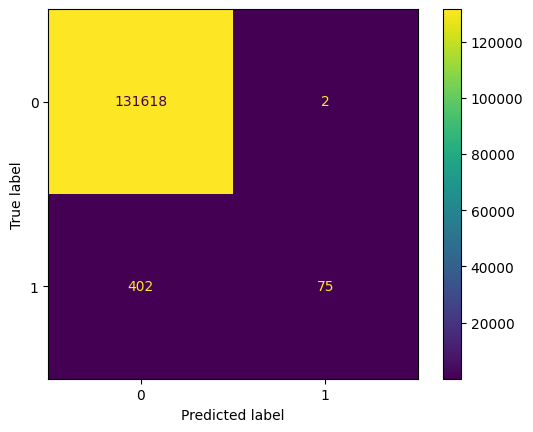

In [ ]:
cm = confusion_matrix(y_test, rfst.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfst.classes_)
disp.plot()
plt.show()

# **Логистическая регрессия**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn import metrics

In [ ]:
rg = LogisticRegression(n_jobs = -1)

In [ ]:
rg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [ ]:
pred_proba = rg.predict_proba(X_test)[:,1]

In [ ]:
accuracy_score(y_train, rg.predict(X_train))

0.996328437074963

In [ ]:
accuracy_score(y_test, rg.predict(X_test))

0.9963890171616312

Вычисляем ошибку на обучающей и тестовой выборке

In [ ]:
err_train = np.mean(y_train != rg.predict(X_train))
err_test  = np.mean(y_test  != rg.predict(X_test))

print(err_train, err_test)

0.003671562925037031 0.0036109828383687746


# **ROC-AUC**

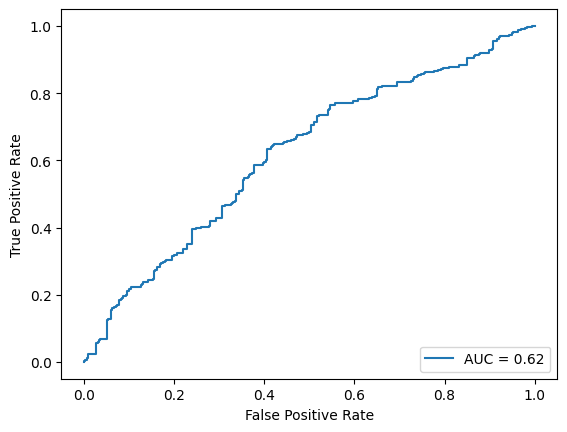

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

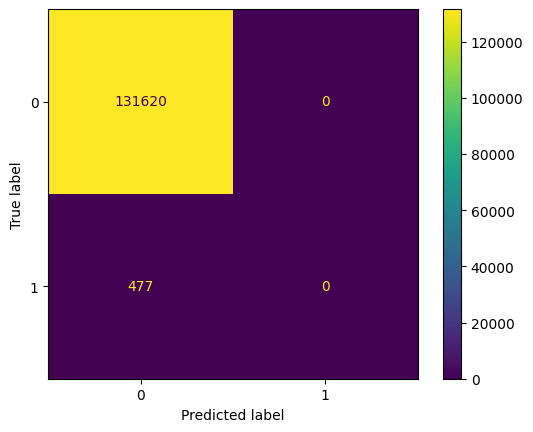

In [ ]:
cm = confusion_matrix(y_test, rg.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rg.classes_)
disp.plot()
plt.show()

# **Полносвязная нейронная сеть**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes = (200,30),
                          activation = 'relu',
                          random_state = 42)

In [ ]:
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 30), random_state=42)

Ошибки на обучающей и тестовой выборках

In [ ]:
err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test  = np.mean(y_test  != mlp_model.predict(X_test))

print(err_train, err_test)

0.003671562925037031 0.0036109828383687746


Матрица рассогласования

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, mlp_model.predict(X_test)))

[[131620      0]
 [   477      0]]


In [ ]:
accuracy_score(y_train, mlp_model.predict(X_train))

0.996328437074963

In [ ]:
accuracy_score(y_test, mlp_model.predict(X_test))

0.9963890171616312

# **Выводы**

Мы обучили разные модели машинного обучения и проделали процесс выбора оптимального гиперпараметра. Также для моделей были построены матрицы рассогласования.

Переобучения мы здесь не наблюдаем. На тесте наименьшее значение ошибки получилось у случайного леса. Самое большое значение accuracy на тесте получилось тоже у случайного леса.